## 필요 라이브러리 선언

In [1]:
import chromedriver_autoinstaller
import edgedriver_autoinstaller
from fake_useragent import UserAgent
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time
import os
import requests
from PIL import Image
from io import BytesIO


## 기타 옵션 설정

In [2]:
# 크롬 옵션 설정
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument(f'user-agent={user_agent}')
options.add_argument('--headless')

# 크롬 버전 확인 및 드라이버 설정
chrome_ver = chromedriver_autoinstaller.get_chrome_version().split('.')[0]

## 크롤링 함수 작성

In [6]:
# 필요한 모듈들을 임포트합니다.
import ssl
import os
import time
import urllib.request
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from fake_useragent import UserAgent

# SSL 인증을 위한 설정을 합니다.
ssl._create_default_https_context = ssl._create_default_https_context

def create_driver():
    # fake_useragent를 이용하여 랜덤한 UserAgent를 생성합니다.
    ua = UserAgent()
    user_agent = ua.random

    # Chrome 드라이버의 옵션을 설정합니다.
    options = webdriver.ChromeOptions()
    options.add_argument(f'user-agent={user_agent}')

    # 설정한 옵션으로 Chrome 드라이버를 생성합니다.
    driver = webdriver.Chrome(options=options)
    return driver

def scroll_down(driver):
    # 스크롤 다운을 위한 대기 시간을 설정합니다.
    SCROLL_PAUSE_TIME = 1

    # 현재 스크롤의 높이를 저장합니다.
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # 스크롤을 가장 아래로 내립니다.
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        
        # 페이지 로딩을 기다립니다.
        time.sleep(SCROLL_PAUSE_TIME)

        # 스크롤이 더 이상 내려가지 않는지 확인합니다.
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            try:
                # "결과 더보기" 버튼이 있다면 클릭합니다.
                driver.find_element(By.CSS_SELECTOR, ".mye4qd").click()
            except:
                break
        last_height = new_height

def download_images(driver, search_key, folder_name):
    # 이미지 요소를 모두 찾아옵니다.
    images = driver.find_elements(By.CSS_SELECTOR, ".rg_i.Q4LuWd")
    count = 1

    for image in images:
        try:
            # 이미지를 클릭합니다.
            image.click()
            time.sleep(0.5)

            # 클릭한 이미지의 URL을 가져옵니다.
            imgUrl = driver.find_element(
                By.XPATH,
                '//*[@id="Sva75c"]/div[2]/div[2]/div[2]/div[2]/c-wiz/div/div/div/div/div[3]/div[1]/a/img[1]'
            ).get_attribute("src")

            # UserAgent를 설정하여 이미지를 다운로드합니다.
            opener = urllib.request.build_opener()
            opener.addheaders = [('User-Agent', ua.random)]
            urllib.request.install_opener(opener)
            urllib.request.urlretrieve(imgUrl, os.path.join(folder_name, f'{search_key}_{str(count)}.jpg'))
            count += 1
        except Exception as e:
            print('e : ', e)
            pass

def google_image_crawler(search_key):
    # 이미지를 저장할 폴더를 설정합니다.
    folder_name = f'./imgs/{search_key}'
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # Chrome 드라이버를 생성합니다.
    driver = create_driver()

    # Google 이미지 검색 페이지로 이동합니다.
    driver.get("https://www.google.co.kr/imghp?hl=ko&tab=wi&ogbl")

    # 검색창에 검색어를 입력하고 검색을 실행합니다.
    elem = driver.find_element("name", "q")
    elem.send_keys(search_key)
    elem.send_keys(Keys.RETURN)

    # 페이지를 모두 스크롤 다운합니다.
    scroll_down(driver)

    # 이미지를 다운로드합니다.
    download_images(driver, search_key, folder_name)

    # 드라이버를 종료합니다.
    driver.close()

## 크롤링 수행

e :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="Sva75c"]/div[2]/div[2]/div[2]/div[2]/c-wiz/div/div/div/div/div[3]/div[1]/a/img[1]"}
  (Session info: chrome=120.0.6099.200); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF1860]
	(No symbol) [0x00007FF7E1EF197C]
	(No symbol) [0x00007FF7E1F34EE7]
	(No symbol) [0x00007FF7E1F1602F]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00007FF7E1F15D93]
	(No symbol) [0x00007FF7E1EE4BDC]
	(No symbol) [0x00007FF7E1EE5C64]
	GetHandleVerifier [0x00007FF7E240E16B+3695259]
	GetHandleVerifier [0x00007FF7E2466737+4057191]
	GetHandleVerifier [0x00007FF7E245E4E3+4023827]
	GetHandleVerifier [0x00007FF7E21304F9+689705]
	(No symbol) [0x00007FF7E200C048]
	(No symb

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="168" height="252" alt="Barrel Jellyfish stock photo - Minden Pictures" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQP1wrHZuNx4pFmxd--BrFuCFKA4h3c_GSe1w&amp;usqp=CAU"> is not clickable at point (104, 863). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00007FF7E1F15D93]
	(No symbol

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="183" height="273" alt="Blue Barrel Jellyfish&quot; by Stocksy Contributor &quot;Marcel&quot; - Stocksy" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBoc_OXxLydAgaVdKNOKkxzphMjlrOC0MNew&amp;usqp=CAU"> is not clickable at point (125, 867). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol)

e :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="Sva75c"]/div[2]/div[2]/div[2]/div[2]/c-wiz/div/div/div/div/div[3]/div[1]/a/img[1]"}
  (Session info: chrome=120.0.6099.200); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF1860]
	(No symbol) [0x00007FF7E1EF197C]
	(No symbol) [0x00007FF7E1F34EE7]
	(No symbol) [0x00007FF7E1F1602F]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00007FF7E1F15D93]
	(No symbol) [0x00007FF7E1EE4BDC]
	(No symbol) [0x00007FF7E1EE5C64]
	GetHandleVerifier [0x00007FF7E240E16B+3695259]
	GetHandleVerifier [0x00007FF7E2466737+4057191]
	GetHandleVerifier [0x00007FF7E245E4E3+4023827]
	GetHandleVerifier [0x00007FF7E21304F9+689705]
	(No symbol) [0x00007FF7E200C048]
	(No symb

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="168" height="300" alt="Barrel Jellyfish washed up on Powillimount beach in Dumfries and Galloway.  April 2014. B. | Fish pet, Beautiful nature, Dumfries" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRrIDw1jT7p_yRpcZpL2itAKLF4nuvjQNE22g&amp;usqp=CAU"> is not clickable at point (107, 857). Other element would receive the click: <div data-ved="0CJUBEDMo7QJqFwoTCJDi5Jm31IMDFQAAAAAdAAAAABAE" data-hveid="149" jsaction="TMn9y:cJhY7b;;cFWHmd:s370ud;" data-id="fhQCIwCbkEvt5M" data-ri="365" jsname="N9Xkfe" class="isv-r PNCib ViTmJb BUooTd" jsmodel="cj77d  cj77d" jscontroller="dPOyed" style="width: 193px; height: 222px;" data-tbnid="fhQCIwCbkEvt5M" data-ictx="1" data-ct="12" data-cb="15" data-cl="21" data-cr="21" data-tw="300" data-ow="2560" data-oh="1440" role="listitem" data-os="3">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktra
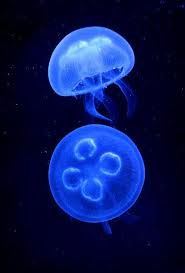

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="200" height="200" alt="Moon Jelly | Akron Zoo" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR4AN8X2gclZCLuCe3uCW0koihQXKneTur5qw&amp;usqp=CAU"> is not clickable at point (121, 873). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00007FF7E1F15D93]
	(No symbol) [0x00007FF7E1EE4BDC]
	

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="180" height="231" alt="Passion Moon Jellyfish Mini - R Frogs Gallery" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSFJ7_cEuQatm0j7OrwXqaT5JDPCLib2D92AA&amp;usqp=CAU"> is not clickable at point (334, 859). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00007FF7E1F15D93]
	(No symbol)

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="198" height="198" alt="Moon Jellyfish (Aurelia aurita) 3D Model $29 - .fbx .obj .max - Free3D" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRi13eG9QhQcdRo41fcC-1xNt2_4csDo4_ffw&amp;usqp=CAU"> is not clickable at point (232, 875). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00007

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="205" height="205" alt="Medium Moon Jellyfish - An American Craftsman" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQT18p8h_ui5ATVEc0yua63Lm6FbUEVMwv_0g&amp;usqp=CAU"> is not clickable at point (232, 872). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00007FF7E1F15D93]
	(No symbol)

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="224" height="224" alt="Moon jelly | SEA LIFE Munich" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQar9RT8lptz7ch8KG0-LeiDuQgPCYop9oBrw&amp;usqp=CAU"> is not clickable at point (132, 872). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00007FF7E1F15D93]
	(No symbol) [0x00007FF7E1EE4

e :  Message: element click intercepted: Element <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTurYBg1eR1gI1ZjlyCGYlvUPKvspWLeBKZbu8YIXLhaWOZJVC43WNjN1B4eWcT0k9JTKI&amp;usqp=CAU" class="rg_i Q4LuWd" jsname="Q4LuWd" width="275" height="184" alt="moon jellyfish Archives - Robin Barefield" data-iml="5084.10000000149"> is not clickable at point (232, 879). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00007FF7E1F15D93]
	(
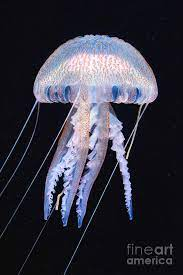

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="102" height="192" alt="Mauve Stinger Jellyfish iPhone 14 Case by Alexander Semenov/science Photo  Library - Science Photo Gallery" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS22EV9HUjjDbvTPvyuF8mZHdHp2c2gMw91Bw&amp;usqp=CAU"> is not clickable at point (109, 875). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x000

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="158" height="237" alt="Mauve Stinger Jellyfish, Pelagia noctiluca, Cap de Creus, Costa... News  Photo - Getty Images" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFHR_p2DvGhwsGBkoA1VXxKveLqCsUtTmcAg&amp;usqp=CAU"> is not clickable at point (99, 862). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]

e :  Message: element click intercepted: Element <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSss4MKRy1UBhzt-zw2fKHhc9-i5DA-1DDcNwFaX0l4wm1MS-HTUEi_imTV_RAH4IvmIdg&amp;usqp=CAU" class="rg_i Q4LuWd" jsname="Q4LuWd" width="259" height="195" alt="Mauve Stinger Jellyfish Stock Photo - Download Image Now - Animal, Gozo -  Malta, Horizontal - iStock" data-iml="3073.89999999851"> is not clickable at point (232, 875). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbo

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="156" height="233" alt="Jellyfish, Mauve Stinger (Pelagia noctiluca) | NiTE Flight Photo Graphics" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQNy2WfZkCZxRY9XnPHOJcLwYvDTDpV6gi2dw&amp;usqp=CAU"> is not clickable at point (98, 865). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x000

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="183" height="275" alt="Mauve Stinger Jellyfish - Stock Image - C012/6670 - Science Photo Library" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRVlf245IlWWOe91XNB3Y2rSvKLgdh1m_tJ1g&amp;usqp=CAU"> is not clickable at point (111, 868). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="145" height="194" alt="Mauve stinger jellyfish design have a sting-credible day pun funny&quot; Art  Print for Sale by Leivenaar | Redbubble" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT1zDOFNj5Z_HXaWqKIn0xQGv6qOojSyBzPhQ&amp;usqp=CAU"> is not clickable at point (92, 875). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symb

e :  Message: element not interactable
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA74C3]
	(No symbol) [0x00007FF7E1EF2D29]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00007FF7E1F15D93]
	(No symbol) [0x00007FF7E1EE4BDC]
	(No symbol) [0x00007FF7E1EE5C64]
	GetHandleVerifier [0x00007FF7E240E16B+3695259]
	GetHandleVerifier [0x00007FF7E2466737+4057191]
	GetHandleVerifier [0x00007FF7E245E4E3+4023827]
	GetHandleVerifier [0x00007FF7E21304F9+689705]
	(No symbol) [0x00007FF7E200C048]
	(No symbol) [0x00007FF7E2008044]
	(No symbol) [0x00007FF7E20081C9]
	(No symbol) [0x00007FF7E1FF88C4]
	BaseThreadInitThunk [0x00007FFA7345257D+29]
	RtlUserThreadStart [0x00007FFA742AAA58+40]

e :  Message: element click intercepted: Element <img data-ils="4" jsa

e :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="Sva75c"]/div[2]/div[2]/div[2]/div[2]/c-wiz/div/div/div/div/div[3]/div[1]/a/img[1]"}
  (Session info: chrome=120.0.6099.200); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF1860]
	(No symbol) [0x00007FF7E1EF197C]
	(No symbol) [0x00007FF7E1F34EE7]
	(No symbol) [0x00007FF7E1F1602F]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00007FF7E1F15D93]
	(No symbol) [0x00007FF7E1EE4BDC]
	(No symbol) [0x00007FF7E1EE5C64]
	GetHandleVerifier [0x00007FF7E240E16B+3695259]
	GetHandleVerifier [0x00007FF7E2466737+4057191]
	GetHandleVerifier [0x00007FF7E245E4E3+4023827]
	GetHandleVerifier [0x00007FF7E21304F9+689705]
	(No symbol) [0x00007FF7E200C048]
	(No symb

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="145" height="205" alt="Lions Mane Jellyfish Cyanea Capillata by Cultura Rf/alexander Semenov" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQvO9tpWs3LWJ57JCI78ATFjTp07uv6731S1g&amp;usqp=CAU"> is not clickable at point (92, 872). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00007FF

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="225" height="225" alt="Lions Mane Jellyfish Illustration 2 Canvas Print by Aqua Art Gallery - Fy" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZlRac5WeRklzC1bi-72S_ZpOZoR17ECcd2A&amp;usqp=CAU"> is not clickable at point (138, 863). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="164" height="231" alt="Lion`sMane Jellyfish Showing it`s Tentacles and Bell. Stock Photo - Image  of europe, background: 185637028" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS4rQ7T5gpbwltzd6dbX6QFwsKKZExW8W6I6g&amp;usqp=CAU"> is not clickable at point (110, 872). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00
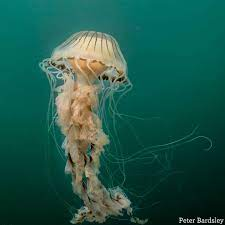

e :  Message: element click intercepted: Element  is not clickable at point (207, 873). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 394px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00007FF7E1F15D93]
	(No symbol) [0x00007FF7E1EE4BDC]
	(No symbol) [0x00007FF7E1EE5C64]
	GetHandleVerifier [0x00007FF7E240E16B+3695259]
	GetHandleVerifier [0x00007FF7E2466737+4057191]
	GetHandleVerifier [0x00007FF7E245E4E3+4023827]
	GetHandleVerifier [0x00007FF7E21304F9+689705]
	(No symbol) [0x00007FF7E200
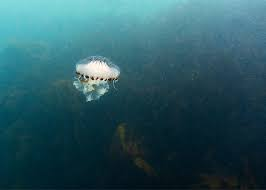

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="210" height="210" alt="Compass Jellyfish - Oniricat. Productes de disseny català." src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQrxalEVFFa8Z78tzQn217wFGxzcYi9vsMacw&amp;usqp=CAU"> is not clickable at point (125, 871). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 394px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00007FF7E1F15D93]

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="259" height="195" alt="File:Compass Jellyfish - geograph.org.uk - 1546635.jpg - Wikimedia Commons" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQH1bSm99HUWpiNdp1NjpBBu6jLalQVjAmmzQ&amp;usqp=CAU"> is not clickable at point (207, 875). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 394px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x0

e :  Message: element click intercepted: Element <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTMI9FvZMtJOnqydtWL2DElrHIzG8AljPqnO3nvie18xyQ4fOkZfYDExDexgF3JDlGAI3o&amp;usqp=CAU" class="rg_i Q4LuWd" jsname="Q4LuWd" width="259" height="195" alt="Catching a Compass Jellyfish - Chrysaora hysoscella - YouTube" data-iml="4073.900000002235"> is not clickable at point (207, 875). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 394px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="259" height="195" alt="Sea Change Project - Thousands of compass jellyfish washed in this weekend,  creating one of the most magical dives. 📷: @rossfrylinck  #RememberYouAreWild | Facebook" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRp-06P8ltMrXRXLR1Wmm2K-D_UJobrM3Nxlw&amp;usqp=CAU"> is not clickable at point (207, 875). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 394px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE

e :  Message: element click intercepted: Element <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8bj1fwlw_78HBShlDFJ04suJ20bOMDUimvPql-EOckQxVbThzeh8RXyZFoOwjrH4sPTg&amp;usqp=CAU" class="rg_i Q4LuWd" jsname="Q4LuWd" width="169" height="261" alt="Kompassqualle, Kompass-Qualle (Chrysaora hysoscella), schwimmend compass  jellyfish, red-banded" data-iml="5111.5"> is not clickable at point (207, 861). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 394px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1

e :  Message: element click intercepted: Element  is not clickable at point (137, 861). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00007FF7E1F15D93]
	(No symbol) [0x00007FF7E1EE4BDC]
	(No symbol) [0x00007FF7E1EE5C64]
	GetHandleVerifier [0x00007FF7E240E16B+3695259]
	GetHandleVerifier [0x00007FF7E2466737+4057191]
	GetHandleVerifier [0x00007FF7E245E4E3+4023827]
	GetHandleVerifier [0x00007FF7E21304F9+689705]
	(No symbol) [0x00007FF7E200
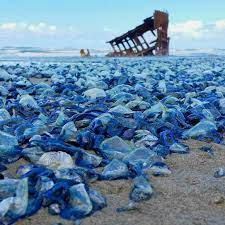

e :  Message: element click intercepted: Element  is not clickable at point (123, 875). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00007FF7E1F15D93]
	(No symbol) [0x00007FF7E1EE4BDC]
	(No symbol) [0x00007FF7E1EE5C64]
	GetHandleVerifier [0x00007FF7E240E16B+3695259]
	GetHandleVerifier [0x00007FF7E2466737+4057191]
	GetHandleVerifier [0x00007FF7E245E4E3+4023827]
	GetHandleVerifier [0x00007FF7E21304F9+689705]
	(No symbol) [0x00007FF7E200
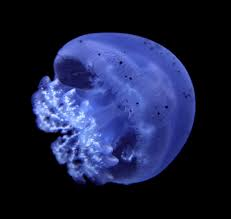
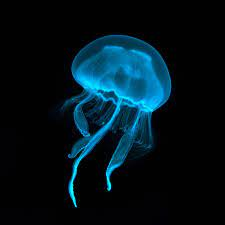

e :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="Sva75c"]/div[2]/div[2]/div[2]/div[2]/c-wiz/div/div/div/div/div[3]/div[1]/a/img[1]"}
  (Session info: chrome=120.0.6099.200); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF1860]
	(No symbol) [0x00007FF7E1EF197C]
	(No symbol) [0x00007FF7E1F34EE7]
	(No symbol) [0x00007FF7E1F1602F]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00007FF7E1F15D93]
	(No symbol) [0x00007FF7E1EE4BDC]
	(No symbol) [0x00007FF7E1EE5C64]
	GetHandleVerifier [0x00007FF7E240E16B+3695259]
	GetHandleVerifier [0x00007FF7E2466737+4057191]
	GetHandleVerifier [0x00007FF7E245E4E3+4023827]
	GetHandleVerifier [0x00007FF7E21304F9+689705]
	(No symbol) [0x00007FF7E200C048]
	(No symb

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="252" height="200" alt="What are these blue creatures washing up on Southern California beaches? -  Los Angeles Times" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPtuyGg07cOizGXgAeP_nUd4aHj6RA_C5csQ&amp;usqp=CAU"> is not clickable at point (148, 873). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="215" height="215" alt="Droves of Elegant Blue Jellies Wash Up on Pacific Shores | Smart News|  Smithsonian Magazine" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSrFfdA4UtDmGS-xuF8kVuzvTRSwBp1uJymeA&amp;usqp=CAU"> is not clickable at point (232, 861). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]

e :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="Sva75c"]/div[2]/div[2]/div[2]/div[2]/c-wiz/div/div/div/div/div[3]/div[1]/a/img[1]"}
  (Session info: chrome=120.0.6099.200); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF1860]
	(No symbol) [0x00007FF7E1EF197C]
	(No symbol) [0x00007FF7E1F34EE7]
	(No symbol) [0x00007FF7E1F1602F]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00007FF7E1F15D93]
	(No symbol) [0x00007FF7E1EE4BDC]
	(No symbol) [0x00007FF7E1EE5C64]
	GetHandleVerifier [0x00007FF7E240E16B+3695259]
	GetHandleVerifier [0x00007FF7E2466737+4057191]
	GetHandleVerifier [0x00007FF7E245E4E3+4023827]
	GetHandleVerifier [0x00007FF7E21304F9+689705]
	(No symbol) [0x00007FF7E200C048]
	(No symb

e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="198" height="198" alt="Jellyfish 키링 BLUE - from_w2" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRL3hJrvSVyYNoBczU1CwpKZecjfm49ZcjI3A&amp;usqp=CAU"> is not clickable at point (342, 875). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 444px;">...</div>
  (Session info: chrome=120.0.6099.200)
Stacktrace:
	GetHandleVerifier [0x00007FF7E23E2142+3514994]
	(No symbol) [0x00007FF7E2000CE2]
	(No symbol) [0x00007FF7E1EA76AA]
	(No symbol) [0x00007FF7E1EF88F3]
	(No symbol) [0x00007FF7E1EF68ED]
	(No symbol) [0x00007FF7E1EF40EC]
	(No symbol) [0x00007FF7E1EF2EA5]
	(No symbol) [0x00007FF7E1EE6A0F]
	(No symbol) [0x00007FF7E1F15FEA]
	(No symbol) [0x00007FF7E1EE63B6]
	(No symbol) [0x00007FF7E1F16490]
	(No symbol) [0x00007FF7E1F328F6]
	(No symbol) [0x00007FF7E1F15D93]
	(No symbol) [0x00007FF7E1EE4B

In [7]:
# 검색어 리스트
search_keywords = [
    "barrel_jellyfish", 
    "Moon_jellyfish", 
    "mauve_stinger_jellyfish", 
    "lions_mane_jellyfish", 
    "compass_jellyfish", 
    "blue_jellyfish"
]

# 각 검색어에 대해 크롤링 수행
for keyword in search_keywords:
    google_image_crawler(keyword)